In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
df = pd.read_csv('UNDP.csv')

In [3]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,18.3777,80.5314,318.6,1.0,1.0,02-01-2015,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0
1,17.5898,80.9893,315.4,1.2,1.1,04-01-2015,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0
2,17.6028,81.1612,311.8,1.2,1.1,05-01-2015,527,Terra,MODIS,46,6.03,299.8,6.0,D,0
3,17.5241,80.3135,317.0,1.1,1.0,05-01-2015,527,Terra,MODIS,69,6.03,302.0,9.3,D,0
4,17.7571,80.3404,317.2,2.5,1.5,05-01-2015,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0


In [4]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18785 entries, 0 to 18784
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    18785 non-null  float64
 1   longitude   18785 non-null  float64
 2   brightness  18785 non-null  float64
 3   scan        18785 non-null  float64
 4   track       18785 non-null  float64
 5   acq_date    18785 non-null  object 
 6   acq_time    18785 non-null  int64  
 7   satellite   18785 non-null  object 
 8   instrument  18785 non-null  object 
 9   confidence  18785 non-null  int64  
 10  version     18785 non-null  float64
 11  bright_t31  18785 non-null  float64
 12  frp         18785 non-null  float64
 13  daynight    18785 non-null  object 
 14  type        18785 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 2.1+ MB


In [6]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,18785.000000,18785.000000,18785.000000,18785.000000,18785.000000,18785.000000,18785.000000,1.878500e+04,18785.000000,18785.000000,18785.000000
mean,18.107730,79.492732,326.273633,1.318334,1.117849,758.082246,60.403673,6.030000e+00,307.703561,17.336247,0.039606
std,0.807683,1.014891,9.052207,0.512420,0.170951,248.184978,17.846347,9.548172e-13,6.477860,17.001765,0.278653
min,15.867800,77.238300,300.000000,1.000000,1.000000,436.000000,0.000000,6.030000e+00,272.600000,3.200000,0.000000
25%,17.690600,78.630400,320.300000,1.000000,1.000000,539.000000,51.000000,6.030000e+00,303.900000,9.000000,0.000000
50%,18.176100,79.707000,326.300000,1.100000,1.100000,802.000000,63.000000,6.030000e+00,308.300000,12.700000,0.000000
75%,18.626500,80.331800,331.700000,1.400000,1.200000,814.000000,72.000000,6.030000e+00,312.300000,19.700000,0.000000
max,19.892000,81.787700,426.100000,4.800000,2.000000,2102.000000,100.000000,6.030000e+00,327.300000,470.400000,2.000000


In [7]:
df1 = df.drop(['instrument' , 'acq_time','acq_date'] , axis = 1)

In [8]:
df1 = pd.get_dummies(columns = ['satellite','daynight'], data = df1)

In [9]:
df1.head()

,latitude,longitude,brightness,scan,track,confidence,version,bright_t31,frp,type,satellite_Aqua,satellite_Terra,daynight_D,daynight_N
0,18.3777,80.5314,318.6,1.0,1.0,69,6.03,302.6,7.7,0,1,0,1,0
1,17.5898,80.9893,315.4,1.2,1.1,59,6.03,299.5,8.8,0,1,0,1,0
2,17.6028,81.1612,311.8,1.2,1.1,46,6.03,299.8,6.0,0,0,1,1,0
3,17.5241,80.3135,317.0,1.1,1.0,69,6.03,302.0,9.3,0,0,1,1,0
4,17.7571,80.3404,317.2,2.5,1.5,53,6.03,300.0,29.3,0,1,0,1,0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18785 entries, 0 to 18784
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         18785 non-null  float64
 1   longitude        18785 non-null  float64
 2   brightness       18785 non-null  float64
 3   scan             18785 non-null  float64
 4   track            18785 non-null  float64
 5   confidence       18785 non-null  int64  
 6   version          18785 non-null  float64
 7   bright_t31       18785 non-null  float64
 8   frp              18785 non-null  float64
 9   type             18785 non-null  int64  
 10  satellite_Aqua   18785 non-null  uint8  
 11  satellite_Terra  18785 non-null  uint8  
 12  daynight_D       18785 non-null  uint8  
 13  daynight_N       18785 non-null  uint8  
dtypes: float64(8), int64(2), uint8(4)
memory usage: 1.5 MB


In [11]:
df1.shape

(18785, 14)

In [12]:
df1['type'] = df1['type'].replace(2,1)

In [13]:
x = df1.drop(columns = 'type')

In [14]:
df1.head(10)

,latitude,longitude,brightness,scan,track,confidence,version,bright_t31,frp,type,satellite_Aqua,satellite_Terra,daynight_D,daynight_N
0,18.3777,80.5314,318.6,1.0,1.0,69,6.03,302.6,7.7,0,1,0,1,0
1,17.5898,80.9893,315.4,1.2,1.1,59,6.03,299.5,8.8,0,1,0,1,0
2,17.6028,81.1612,311.8,1.2,1.1,46,6.03,299.8,6.0,0,0,1,1,0
3,17.5241,80.3135,317.0,1.1,1.0,69,6.03,302.0,9.3,0,0,1,1,0
4,17.7571,80.3404,317.2,2.5,1.5,53,6.03,300.0,29.3,0,1,0,1,0
5,17.7513,80.3465,316.8,2.5,1.5,57,6.03,300.8,27.5,0,1,0,1,0
6,17.7421,80.3616,324.6,2.1,1.4,77,6.03,303.7,44.0,0,1,0,1,0
7,17.7385,80.3420,328.7,2.1,1.4,81,6.03,305.8,58.6,0,1,0,1,0
8,17.9539,80.8069,314.0,1.0,1.0,52,6.03,302.8,5.6,1,0,1,1,0
9,19.0243,78.3855,317.1,1.2,1.1,58,6.03,303.6,8.3,0,1,0,1,0


In [15]:
y = df1['type']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test,Y_train, Y_test = train_test_split(x,y ,test_size = 0.30, random_state = 10)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaler.fit(x)

StandardScaler()

In [20]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [21]:
X_train_s.shape
X_test_s.shape 

(5636, 13)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=2)
clf_knn_1.fit(X_train_s,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
confusion_matrix(Y_test, clf_knn_1.predict(X_test))

array([[5518,    0],
       [ 118,    0]], dtype=int64)

In [25]:
accuracy_score(Y_test, clf_knn_1.predict(X_test))

0.9790631653655074

In [26]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [29]:
grid_search_cv.fit(X_train_s, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]})

In [30]:
grid_search_cv.best_params_

{'n_neighbors': 4}

In [31]:
optimised_KNN = grid_search_cv.best_estimator_

In [32]:
y_test_knn = optimised_KNN.predict(X_test) 

In [33]:
confusion_matrix(Y_test, y_test_knn)

array([[5518,    0],
       [ 118,    0]], dtype=int64)

In [34]:
accuracy_score(Y_test, y_test_knn)

0.9790631653655074

In [60]:
z = optimised_KNN.predict_proba(X_test_s) 

In [61]:
y = optimised_KNN.predict_proba(X_train_s) 

# KMEANSALGORITHM

In [37]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train_s, Y_train)

KMeans(n_clusters=2, random_state=0)

In [39]:
kpred = KMeans_Clustering.predict(X_test_s)

In [40]:
confusion_matrix(Y_test,kpred)

array([[ 221, 5297],
       [  22,   96]], dtype=int64)

In [41]:
accuracy_score(Y_test,kpred)

0.05624556422995032

Text(0, 0.5, 'WCSS')

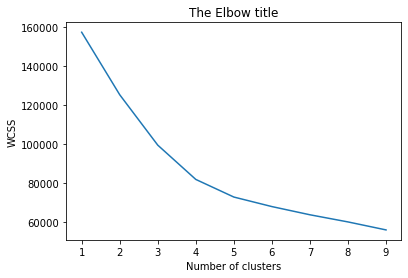

In [51]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_train_s, Y_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [52]:
params = {'n_clusters': [2, 3, 4, 5]}

In [53]:
grid_search_cv = GridSearchCV(KMeans(), params)

In [54]:
grid_search_cv.fit(X_train_s, Y_train)

GridSearchCV(estimator=KMeans(), param_grid={'n_clusters': [2, 3, 4, 5]})

In [55]:
grid_search_cv.best_params_

{'n_clusters': 5}

In [56]:
optimised_KM = grid_search_cv.best_estimator_

In [57]:
y_test_kM = optimised_KM.predict(X_test_s) 

In [58]:
confusion_matrix(Y_test, y_test_kM)

array([[1489, 1954,  434,  221, 1420],
       [  45,   36,    2,   22,   13],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0]], dtype=int64)

In [59]:
accuracy_score(Y_test, y_test_kM)

0.2705819730305181

In [66]:
import numpy

In [70]:
a = numpy.concatenate([z,y])

In [71]:
dfz = pd.DataFrame(a)

In [72]:
dfz

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
18780,1.0,0.0
18781,1.0,0.0
18782,1.0,0.0
18783,1.0,0.0


In [73]:
dfz.to_json("output2.json")